<a href="https://colab.research.google.com/github/B1501/Charitha_INFO5502_Spring2022/blob/main/lab_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

In [2]:
### You code here
#loading the dataset
import pandas as pd
stockprice_data=pd.read_csv("/content/portfolio_data.csv")
stockprice_data

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
...,...,...,...,...,...
1515,5/8/2019,1917.770020,283.149994,6171.959961,364.369995
1516,5/9/2019,1899.869995,282.160004,6358.290039,362.750000
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010


In [3]:
#describing the dataset using desc function
stockprice_data.describe()

,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


In [4]:
# here we are using text customization
from termcolor import colored as cl
print(cl(stockprice_data.dtypes, attrs = ['bold']))

Date     object
AMZN    float64
DPZ     float64
BTC     float64
NFLX    float64
dtype: object


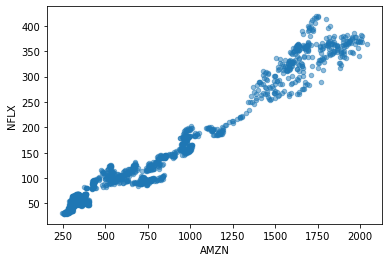

In [5]:
#plotting the graphs inorder to compare the two columns like amazon and netflixs
import matplotlib.pyplot as plt
stockprice_data.plot(kind="scatter", x="AMZN", y="NFLX", alpha=0.5)

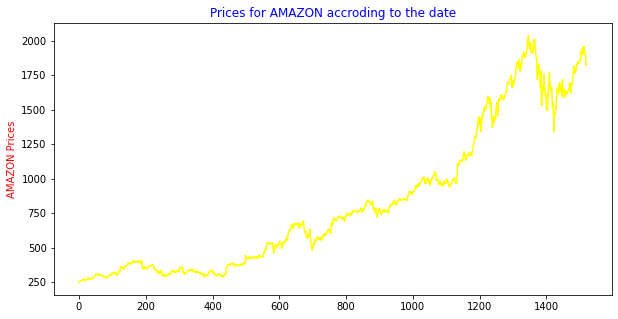

In [6]:
#plotting the graph for separate columns like amazon using the dataset
stprc_AMZN = stockprice_data[['AMZN']] 
stprc_AMZN.AMZN.plot(figsize=(10,5),color = 'yellow')
# we are plotting a histogram 
plt.title('Prices for AMAZON accroding to the date',color ='blue')
plt.ylabel("AMAZON Prices",color='red')
plt.show()

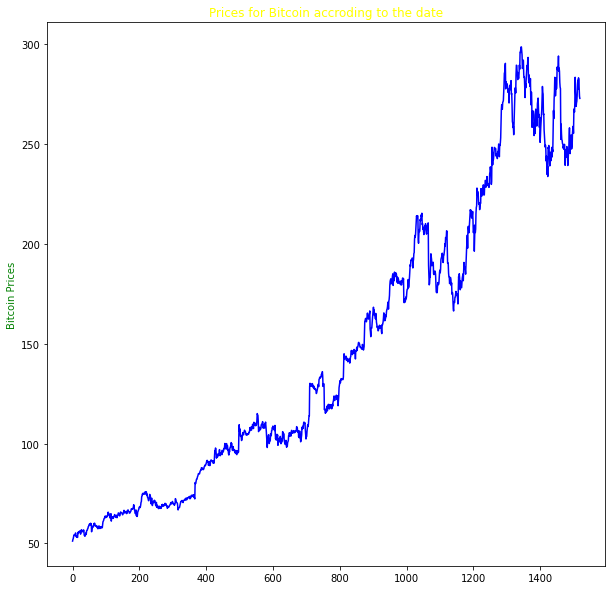

In [7]:
#plotting the histogram for bitcoin prices
stprc_DPZ = stockprice_data[['DPZ']] 
stprc_DPZ.DPZ.plot(figsize=(10,10),color = 'blue')
plt.title('Prices for Bitcoin accroding to the date',color ='yellow')
plt.ylabel("Bitcoin Prices",color='green')
plt.show()

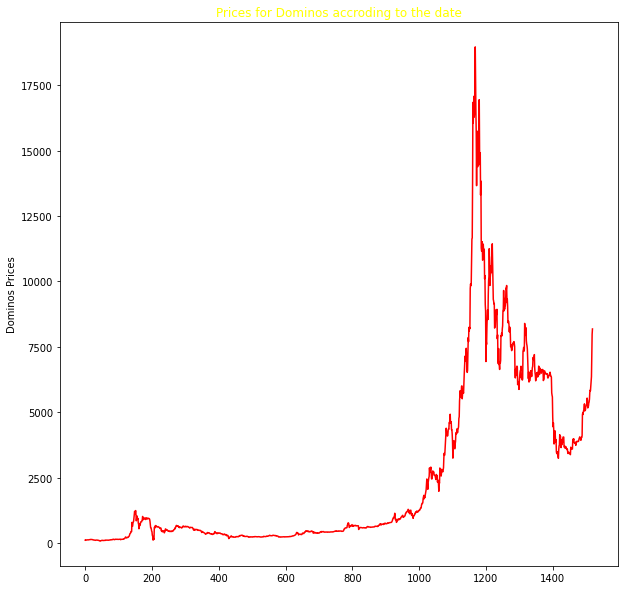

In [8]:
#plotting the histogram for dominoz prices
stprc_BTC = stockprice_data[['BTC']] 
stprc_BTC.BTC.plot(figsize=(10,10),color = 'red')
plt.title('Prices for Dominos accroding to the date',color ='yellow')
plt.ylabel("Dominos Prices",color='black')
plt.show()

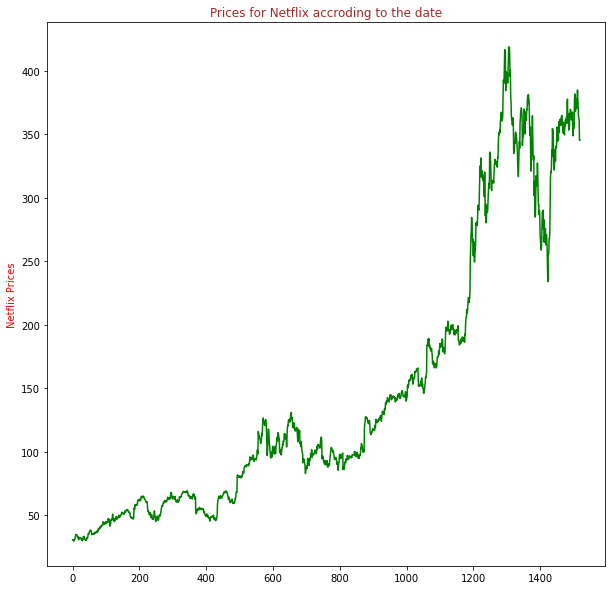

In [9]:
#plotting the histogram for netflix prices
stprc_NFLX = stockprice_data[['NFLX']] 
stprc_NFLX.NFLX.plot(figsize=(10,10),color = 'green')
plt.title('Prices for Netflix accroding to the date',color ='brown')
plt.ylabel("Netflix Prices",color='red')
plt.show()

In [10]:
#here we are taking the average of each columns by using the s_6 and s_4 and window indicates the number of observations used
stprc_AMZN['S_6']= stprc_AMZN['AMZN'].shift(1).rolling(window=6).mean() 
stprc_AMZN['S_4']= stprc_AMZN['AMZN'].shift(1).rolling(window=4).mean() 
stprc_NFLX['S_6'] = stprc_NFLX['NFLX'].shift(1).rolling(window=6).mean() 
stprc_NFLX['S_4']= stprc_NFLX['NFLX'].shift(1).rolling(window=4).mean() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [11]:
##here we are taking the average of each columns by using the s_6 and s_4 and window indicates the number of observations used
stprc_DPZ['S_6'] = stprc_DPZ['DPZ'].shift(1).rolling(window=6).mean() 
stprc_DPZ['S_4']= stprc_DPZ['DPZ'].shift(1).rolling(window=4).mean() 
stprc_BTC['S_6'] = stprc_BTC['BTC'].shift(1).rolling(window=6).mean() 
stprc_BTC['S_4']= stprc_BTC['BTC'].shift(1).rolling(window=4).mean() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [12]:
#after calculating the average of the observations we are removing the rows that contain null values
stprc_AMZN= stprc_AMZN.dropna()
stprc_DPZ= stprc_DPZ.dropna()

In [13]:
#after calculating the average of the observations we are removing the rows that contain null values
stprc_BTC= stprc_BTC.dropna()
stprc_NFLX= stprc_NFLX.dropna()

In [14]:
start_AMZN = stprc_AMZN[['S_6','S_4']] 
start_DPZ = stprc_DPZ[['S_6','S_4']] 

In [15]:
start_BTC = stprc_BTC[['S_6','S_4']] 
start_NFLX = stprc_NFLX[['S_6','S_4']] 

In [16]:
#here we are printing only few of the rows using head function to undertand easily
print(start_AMZN.head())

           S_6         S_4
6   255.159999  257.544998
7   257.148333  258.072502
8   258.995000  260.050003
9   260.071671  261.745003
10  262.173335  264.157502


In [17]:
#here we are printing only few of the rows using head function to undertand easily
print(start_DPZ.head())

          S_6        S_4
6   52.894530  53.547219
7   53.366089  53.940707
8   53.761139  54.228798
9   54.115591  54.334196
10  54.460674  54.556703


In [18]:
#here we are printing only few of the rows using head function to undertand easily
print(start_BTC.head())

           S_6         S_4
6   108.808333  112.125000
7   110.716666  113.324999
8   113.639999  114.834999
9   113.389999  114.385000
10  114.160000  114.740000


In [19]:
#here we are printing only few of the rows using head function to undertand easily
print(start_NFLX.head())

          S_6        S_4
6   30.152381  29.964286
7   30.235714  30.070000
8   30.311905  30.320000
9   30.691190  31.146071
10  31.245476  32.051786


In [20]:
end_AMZN = stprc_AMZN['AMZN']
end_DPZ = stprc_DPZ['DPZ']

In [21]:
end_BTC = stprc_BTC['BTC']
end_NFLX = stprc_NFLX['NFLX']

In [22]:
#here we are printing only few of the rows using head function to undertand easily
print(end_AMZN.head())

6     260.160004
7     263.630005
8     264.510010
9     268.329987
10    266.559998
Name: AMZN, dtype: float64


In [23]:
#here we are printing only few of the rows using head function to undertand easily
print(end_DPZ.head())

6     54.020340
7     54.357620
8     54.573097
9     55.275757
10    54.001606
Name: DPZ, dtype: float64


In [24]:
#here we are printing only few of the rows using head function to undertand easily
print(end_BTC.head())

6     117.699997
7     115.639999
8     111.400002
9     114.220001
10    118.209999
Name: BTC, dtype: float64


In [25]:
#here we are printing only few of the rows using head function to undertand easily
print(end_NFLX.head())

6     30.915714
7     31.098572
8     32.768570
9     33.424286
10    34.771427
Name: NFLX, dtype: float64


In [26]:
#we are saying that 80% train data and 20% test data
test_train=.8 
test_train = int(test_train*len(stprc_AMZN)) 
# creating the Train dataset AMZN column
start_train_AMZN = start_AMZN[:test_train] 
final_train_AMZN = end_AMZN[:test_train]  
# creating the Test dataset AMZN column
start_test_AMZN = start_AMZN[test_train:] 
final_test_AMZN = end_AMZN[test_train:]

In [27]:
# creating the Train dataset for DPZ column
start_train_DPZ = start_DPZ[:test_train] 
final_train_DPZ = end_DPZ[:test_train]  
# creating the Test dataset for DPZ column
start_test_DPZ = start_DPZ[test_train:] 
final_test_DPZ = end_DPZ[test_train:]

In [28]:
# creating the Train dataset for BTC column
start_train_BTC = start_BTC[:test_train] 
final_train_BTC = end_BTC[:test_train]  
# creating the Test dataset for BTC column
start_test_BTC = start_BTC[test_train:] 
final_test_BTC = end_BTC[test_train:]

In [29]:
# creating the Train dataset for NFLX column
start_train_NFLX = start_NFLX[:test_train] 
final_train_NFLX = end_NFLX[:test_train]  
# creating the Test dataset for NFLX column
start_test_NFLX = start_NFLX[test_train:] 
final_test_NFLX = end_NFLX[test_train:]

In [30]:
#using linear regression we are building the model usinf the 4 columns
from sklearn.linear_model import LinearRegression
linear_reg_AMZN = LinearRegression().fit(start_train_AMZN,final_train_AMZN)
linear_reg_DPZ = LinearRegression().fit(start_train_DPZ,final_train_DPZ)
linear_reg_BTC = LinearRegression().fit(start_train_BTC,final_train_BTC)
linear_reg_NFLX = LinearRegression().fit(start_train_NFLX,final_train_NFLX)
#predicting all the columns using predict function and also train and test datsets
predict_price_AMZN = linear_reg_AMZN.predict(start_test_AMZN)
predict_price_DPZ = linear_reg_DPZ.predict(start_test_DPZ)
predict_price_BTC = linear_reg_BTC.predict(start_test_BTC)  
predict_price_NFLX = linear_reg_NFLX.predict(start_test_NFLX)

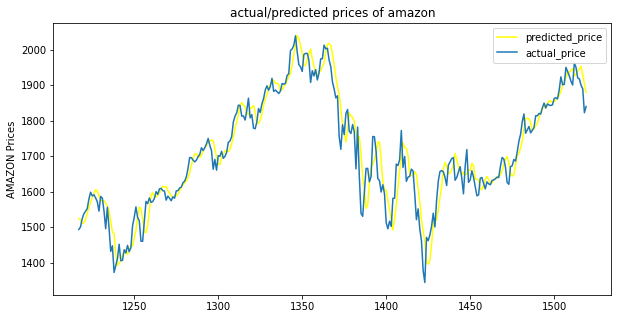

,price
1217,1524.390649
1218,1520.510989
1219,1509.849621
1220,1512.096164
1221,1520.851572
...,...
1515,1945.947438
1516,1953.957348
1517,1929.203389
1518,1905.200656


In [31]:
#creating the visualiztion for predicted column
predi_price_Amazon = pd.DataFrame(predict_price_AMZN,index=final_test_AMZN.index,columns = ['price'])
predi_price_Amazon.plot(figsize=(10,5),color = 'yellow') 
final_test_AMZN.plot()
plt.title("actual/predicted prices of amazon")
#after building the model we are showing the actual and predicted values  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("AMAZON Prices")  
plt.show()
predi_price_Amazon

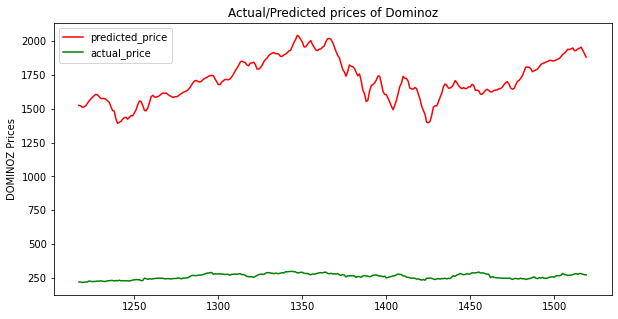

,price
1217,1524.390649
1218,1520.510989
1219,1509.849621
1220,1512.096164
1221,1520.851572
...,...
1515,1945.947438
1516,1953.957348
1517,1929.203389
1518,1905.200656


In [32]:
#creating the visualiztion for predicted column
prediction_price_Dominoz = pd.DataFrame(predict_price_AMZN,index=final_test_DPZ.index,columns = ['price'])
prediction_price_Dominoz.plot(figsize=(10,5),color = 'red') 
final_test_DPZ.plot(color='green')  
plt.title("Actual/Predicted prices of Dominoz")
#after building the model we are showing the actual and predicted values  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("DOMINOZ Prices")  
plt.show()
prediction_price_Dominoz

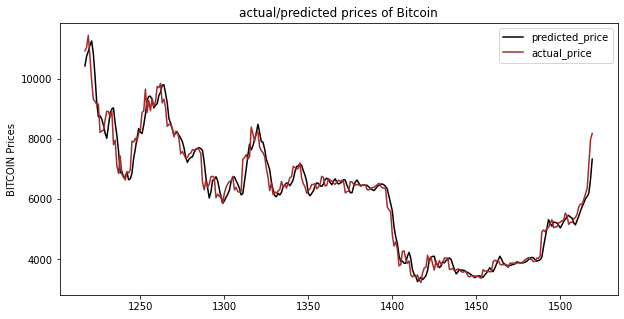

,price
1217,10425.366046
1218,10749.554856
1219,10904.326304
1220,11116.070856
1221,11254.474837
...,...
1515,6016.633291
1516,6090.227125
1517,6203.480082
1518,6669.158379


In [33]:
#creating the visualiztion for predicted column
pred_price_Bitcoin = pd.DataFrame(predict_price_BTC,index=final_test_BTC.index,columns = ['price'])
pred_price_Bitcoin.plot(figsize=(10,5),color = 'black') 
final_test_BTC.plot(color='brown')  
plt.title("actual/predicted prices of Bitcoin")
#after building the model we are showing the actual and predicted values  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("BITCOIN Prices")  
plt.show()
pred_price_Bitcoin

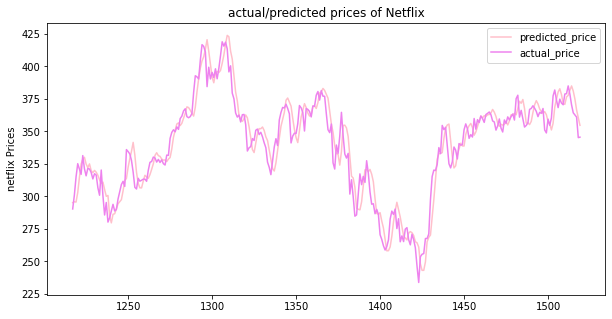

,price
1217,295.264657
1218,295.958166
1219,295.671290
1220,303.003275
1221,314.663841
...,...
1515,381.121740
1516,374.886556
1517,366.505058
1518,360.725057


In [34]:
#creating the visualiztion for predicted column
predic_price_Netflix = pd.DataFrame(predict_price_NFLX,index=final_test_NFLX.index,columns = ['price'])
predic_price_Netflix.plot(figsize=(10,5),color = 'pink') 
final_test_NFLX.plot(color='violet') 
plt.title("actual/predicted prices of Netflix")
#after building the model we are showing the actual and predicted values   
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("netflix Prices")  
plt.show()
predic_price_Netflix

### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [36]:
### You code here:
# loading the test and train datasets at a time
import pandas as pd
tweet_trin=pd.read_csv("/content/train.csv")
test_twet=pd.read_csv("/content/test.csv")

In [37]:
# I have returned the specific number of rows to undertand the data properly for train dataset
tweet_trin.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [38]:
# I have returned the specific number of rows to undertand the data properly for test dataset
test_twet.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [39]:
tweet_trin[tweet_trin['label']==0].head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [40]:
tweet_trin[tweet_trin['label']==1].head(5)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [41]:
#printing the rows and columns in both test and train datasets
tweet_trin.shape,test_twet.shape

((31962, 3), (17197, 2))

In [42]:
#counting the values in train dataset with the 0's and 1's
tweet_trin['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

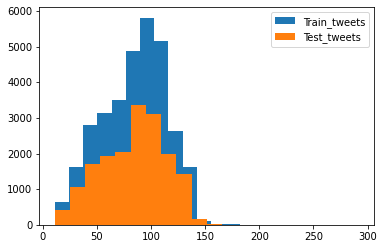

In [43]:
#impotred the packages to plot the graphs
import matplotlib.pyplot as plt
%matplotlib inline
#finding the length of the both the datasets
len_train = tweet_trin['tweet'].str.len() 
len_test = test_twet['tweet'].str.len() 
#plotting the graph by using train and test datasets using matplotlib
plt.hist(len_train, bins=20, label="Train_tweets") 
plt.hist(len_test, bins=20, label="Test_tweets") 
plt.legend() 
plt.show()

In [45]:
#Here we are combining the train and test datsets inorder to make the predictions at last
combine_test_train = tweet_trin.append(test_twet, ignore_index=True) 
combine_test_train.shape

(49159, 3)

In [46]:
# logic to remove unwanted text patterns from the tweets in the datasets
import re
def remove_pattern(input_txt, pattern):
    remv = re.findall(pattern, input_txt)
    for it in remv:
        input_txt = re.sub(it, '', input_txt)
    return input_txt

In [47]:
#logic to remove special characters i.e,(@)
combine_test_train['clean_tweet'] = combine_test_train['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))
combine_test_train.head(6)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...


In [48]:
#Logic to remove upper and lower cases, numbers,punctuations,special characters
combine_test_train['clean_tweet'] = combine_test_train['clean_tweet'].str.replace("[^a-zA-Z#]", " ") 
combine_test_train.head(8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause they...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...


In [49]:
pip install unidecode

     |████████████████████████████████| 235 kB 4.4 MB/s 


In [50]:
#logic to Remove all the greek characters using unidecode library
import unidecode
combine_test_train['clean_tweet'] = combine_test_train['clean_tweet'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()])) 
combine_test_train

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause they...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid #hairflip #neverready #...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio omg amp us...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads t...


In [51]:
#logic To check whether the disappearance of greek symbols are gone or not
combine_test_train['clean_tweet'][8]

'we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers'

In [52]:
#Logic to remove slang words and add the full words instead of shortcuts
slang_remv = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food'} ## we Need a huge dictionary
words = "I wud lyk to go out with fam"
words = words.split()
reform_slang = [slang_remv[word] if word in slang_remv else word for word in words]
reform_slang = " ".join(reform_slang)

In [53]:
#checking whether it is removing the slang words or not
reform_slang

'I would like to go out with family'

In [54]:
#keeping the dataset in a proper way after replacing all the slang words
combine_test_train['clean_tweet'] = combine_test_train['clean_tweet'].apply(lambda x : ' '.join(slang_remv[word] if word in slang_remv else word for word in x.split()))
combine_test_train

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause they...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid #hairflip #neverready #...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio oh my god!...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads t...


In [55]:
import pandas_profiling
import nltk
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [56]:
#we are Removing stopwords inorder to understand the tweets in easier way
combine_test_train['clean_tweet'] = combine_test_train['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))
combine_test_train.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit use cause offer wheelchair...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love u take u time ur
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [57]:
#here we are doing Lemmitization to convert into root form
lemmatizer_root = WordNetLemmatizer()
combine_test_train['clean_tweet'] = combine_test_train['clean_tweet'].apply(lambda x : ' '.join([lemmatizer_root.lemmatize(word) for word in x.split()]))
combine_test_train

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit use cause offer wheelchair...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love u take u time ur
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid #hairflip #neverready #fo...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today #ohio oh god! amp u...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy work conference right mindset lead cultu...


In [58]:
#we are doing Stemming inorder to reduce the stem words
pstem = PorterStemmer()
adwait = tweet_trin
#adwait.head()
combine_test_train['clean_tweet'] = combine_test_train['clean_tweet'].apply(lambda x : ' '.join([pstem.stem(word) for word in x.split()]))
combine_test_train.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit use caus offer wheelchair v...
2,3,0.0,bihday your majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love u take u time ur
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare big talk leav chao pay disput ge...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camp tomorrow danni
7,8,0.0,the next school year is the year for exams.ð...,next school year year exam think #school #exam...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cav #champion #cleveland #cl...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcom #gr


Positive words = 


(-0.5, 699.5, 399.5, -0.5)

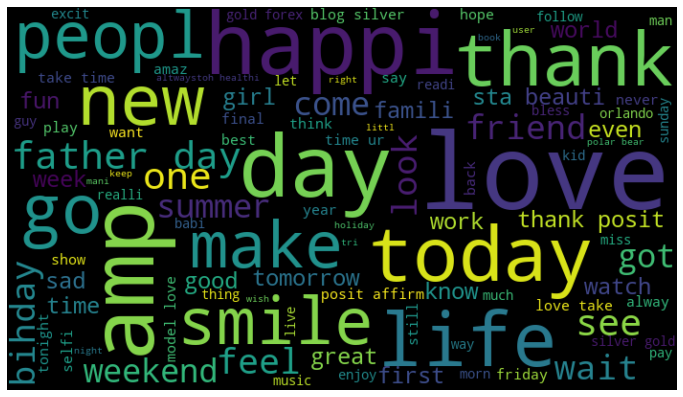

In [59]:
#code for non racist/sexist tweets
postive_words = ' '.join([word for word in combine_test_train['clean_tweet'][combine_test_train['label'] == 0]])
wordcloud = WordCloud(width = 700, height = 400, max_font_size = 110,max_words = 100).generate(postive_words)
print('Positive words = ')
plt.figure(figsize= (12,9))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Negative words = 


(-0.5, 699.5, 399.5, -0.5)

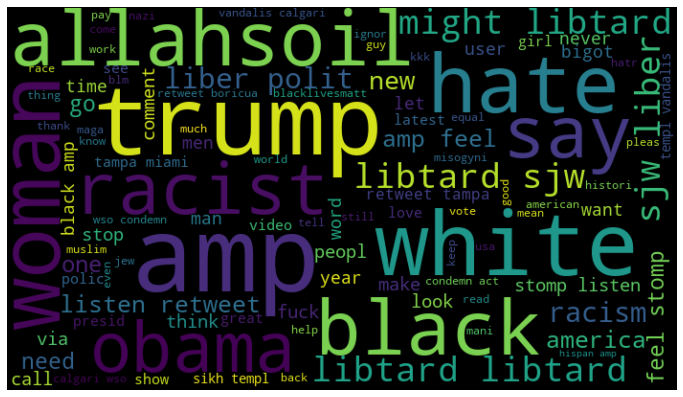

In [60]:
#code for racist/sexist tweets
negtive_words = ' '.join([word for word in combine_test_train['clean_tweet'][combine_test_train['label'] == 1]])
wordcloud = WordCloud(width = 700, height = 400, max_font_size = 110,max_words = 100).generate(negtive_words)
print('Negative words = ')
plt.figure(figsize= (12,9))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

In [61]:
from sklearn.feature_extraction.text import CountVectorizer 
import gensim

In [62]:
#creating bag of word feature concept to create unique words 
bow_vector = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow_feature = bow_vector.fit_transform(combine_test_train['clean_tweet']) 
bow_feature.shape

(49159, 1000)

In [63]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [64]:
import numpy as np
# Extracting train and test BoW features 
train_bagofw = bow_feature[:31962,:] 
test_bagofw = bow_feature[31962:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bagofw, tweet_trin['label'],random_state=42,test_size=0.3)
lreg = LogisticRegression() 
# training the model 
lreg.fit(xtrain_bow, ytrain)
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_scor = f1_score(yvalid, prediction_int) 
# calculating f1 score for the validation set
print("The F1 score for validaiton set:-",f1_scor)

The F1 score for validaiton set:- 0.5603305785123966


In [65]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(yvalid, prediction_int)
print("The accuracy score for validation set:-",acc_score)

The accuracy score for validation set:- 0.9445197622275524


In [66]:
from sklearn.metrics import precision_score
preci_score = precision_score(yvalid, prediction_int)
print("The Precision score for vailidation set:-",preci_score)

The Precision score for vailidation set:- 0.6444866920152091


In [67]:
from sklearn.metrics import recall_score
recal_core = recall_score(yvalid, prediction_int)
print("The recall score for validation set:-",recal_core)

The recall score for validation set:- 0.4956140350877193
